# Lab Assignment One: Exploring Table Data

#### Everett Cienkus, Blake Miller, Colin Weil

## 1. Business Understanding
This dataset contains data for all NBA games from the 2004-2005 season until March of the 2021-2022 season.From the description of the dataset, the data was collected from the NBA stats website.

This dataset can be useful for various parties, including NBA teams, coaches, players, sports bettors, or anyone looking to better understand basketball statistics. In our exploration we will be specifically looking at the application of this data for an NBA team General Manager.

According to www.investopedia.com, of the 30 NBA teams "a team is worth on average $2.12 billion", and "total revenue across the organization reached 8.76 billion in the 2018-2019 season." This makes the role of a GM extremely important, as they must manage a multi-billion dollar business.

Through analyzing thousands of NBA game data from this dataset, a GM could make better informed decisions on what statistics are most impactful on the game, and use that information to draft players which have the strengths that they need to build their team.


## 2. Data Understanding

### 2.1 Data Description

In [272]:
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)
df = pd.read_csv('NBA_datasets/games.csv') # read in the csv file
#Split stats into home and away
home_df = df[["GAME_DATE_EST","PTS_home","FG_PCT_home","FT_PCT_home","FG3_PCT_home","AST_home","REB_home", "HOME_TEAM_WINS"]]
away_df = df[["GAME_DATE_EST","PTS_away","FG_PCT_away","FT_PCT_away","FG3_PCT_away","AST_away","REB_away", "HOME_TEAM_WINS"]]

#Convert HOME_TEAM_WINS the to appropriate value based on home or away team
home_df=home_df.rename(columns={'HOME_TEAM_WINS':'WIN'})
away_df=away_df.rename(columns={'HOME_TEAM_WINS':'WIN'})
away_df["WIN"]=np.logical_not(away_df["WIN"]).astype(int)

home_df.columns = ['GAME_DATE_EST', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'WIN']
home_df["HOME"]= 1
away_df.columns = ['GAME_DATE_EST', 'PTS', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'AST', 'REB', 'WIN']
away_df["HOME"]= 0
df = pd.concat([home_df, away_df])
df['GAME_DATE_EST'] = pd.DatetimeIndex(df['GAME_DATE_EST']).year

#display
display(df.head())

Pandas: 1.4.2
Numpy: 1.21.5


,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
0,2022,104.0,0.398,0.760,0.333,23.0,53.0,0,1
1,2022,101.0,0.443,0.933,0.429,20.0,46.0,1,1
2,2022,108.0,0.412,0.813,0.324,28.0,52.0,0,1
3,2022,122.0,0.484,0.933,0.400,33.0,55.0,1,1
4,2022,115.0,0.551,0.750,0.407,32.0,39.0,0,1


Home and away statistics were originally in the same instance. We split each instance into two, one instance representing the home game and one representing the away game played. The home feature is shown as 1 for a home game and a 0 as not home (away).

In [273]:
# find the data type
print(df.info())
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51592 entries, 0 to 25795
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GAME_DATE_EST  51592 non-null  int64  
 1   PTS            51394 non-null  float64
 2   FG_PCT         51394 non-null  float64
 3   FT_PCT         51394 non-null  float64
 4   FG3_PCT        51394 non-null  float64
 5   AST            51394 non-null  float64
 6   REB            51394 non-null  float64
 7   WIN            51592 non-null  int64  
 8   HOME           51592 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 3.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 51394 entries, 0 to 25795
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GAME_DATE_EST  51394 non-null  int64  
 1   PTS            51394 non-null  float64
 2   FG_PCT         51394 non-null  float64
 3   FT_PCT         51394

(NEED TO DO) Describe the data

In [274]:
# find the data summary
display(df.describe())

,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
count,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000,51394.000000
mean,2012.447212,101.700082,0.454789,0.758893,0.352655,22.070339,42.715473,0.500000,0.500000
std,5.391947,13.333345,0.056352,0.102066,0.111117,5.202080,6.604647,0.500005,0.500005
min,2003.000000,33.000000,0.244000,0.143000,0.000000,4.000000,15.000000,0.000000,0.000000
25%,2008.000000,93.000000,0.417000,0.696000,0.281000,18.000000,38.000000,0.000000,0.000000
50%,2013.000000,101.000000,0.453000,0.765000,0.353000,22.000000,42.000000,0.500000,0.500000
75%,2017.000000,111.000000,0.494000,0.829000,0.423000,25.000000,47.000000,1.000000,1.000000
max,2022.000000,168.000000,0.687000,1.000000,1.000000,50.000000,81.000000,1.000000,1.000000


In [275]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df.columns

data_des['Description'] = ['date the game occured', 'number of points scored', 'percentage of all shots made',
                          'percentage of free throws made', 'percentage of three point shots made',
                          'number of assists', 'number of rebounds',
                          'whether the game was won', 'whether the team was home or away']

data_des['Scales'] = ['ordinal'] * 2 + ['ratio'] * 3 + ['ordinal'] * 2 + ['norminal'] * 2

data_des['Discrete\Continuous'] = ['discrete'] + ['continuous'] * 6  + ['discrete'] * 2

data_des['Range'] = ['Placeholder','33 - 168','.244 - .687','.143 - 1','0 - 1','4 - 50','15 - 81','0: No; 1: Yes','0: No; 1: Yes']

data_des

,Features,Description,Scales,Discrete\Continuous,Range
0,GAME_DATE_EST,date the game occured,ordinal,discrete,Placeholder
1,PTS,number of points scored,ordinal,continuous,33 - 168
2,FG_PCT,percentage of all shots made,ratio,continuous,.244 - .687
3,FT_PCT,percentage of free throws made,ratio,continuous,.143 - 1
4,FG3_PCT,percentage of three point shots made,ratio,continuous,0 - 1
5,AST,number of assists,ordinal,continuous,4 - 50
6,REB,number of rebounds,ordinal,continuous,15 - 81
7,WIN,whether the game was won,norminal,discrete,0: No; 1: Yes
8,HOME,whether the team was home or away,norminal,discrete,0: No; 1: Yes


The table above shows the features description, scales, discrete or continuous classification, and range.

### 2.2 Data Quality

In [276]:
# find the duplicate instances
idx = df.duplicated()

# find the number of duplicate (not first show)
len(df[idx])

df.drop_duplicates()


,GAME_DATE_EST,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,WIN,HOME
0,2022,104.0,0.398,0.760,0.333,23.0,53.0,0,1
1,2022,101.0,0.443,0.933,0.429,20.0,46.0,1,1
2,2022,108.0,0.412,0.813,0.324,28.0,52.0,0,1
3,2022,122.0,0.484,0.933,0.400,33.0,55.0,1,1
4,2022,115.0,0.551,0.750,0.407,32.0,39.0,0,1
...,...,...,...,...,...,...,...,...,...
25791,2014,87.0,0.366,0.643,0.375,17.0,43.0,0,0
25792,2014,85.0,0.411,0.636,0.267,17.0,47.0,1,0
25793,2014,95.0,0.387,0.659,0.500,19.0,43.0,0,0
25794,2014,94.0,0.469,0.725,0.385,18.0,45.0,0,0


(NEED TO DO) Describe the data and Describe that we are going to remove duplicates

In [277]:
# find the duplicate instances
idx = df.duplicated()

# find the number of duplicate (not first show)
len(df[idx])

28

(NEED TO DO) Describe the data

In [278]:
# Code goes here

## 3. Data Visualization

### 3.1 Data Exploration

In [279]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
np.warnings.filterwarnings('ignore')
%matplotlib inline

In [280]:
df_wins = df[df['WIN'] == 1]
df_losses =  df[df['WIN'] == 0]

#### 3.1.1 Points by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Points for Win vs Loss')

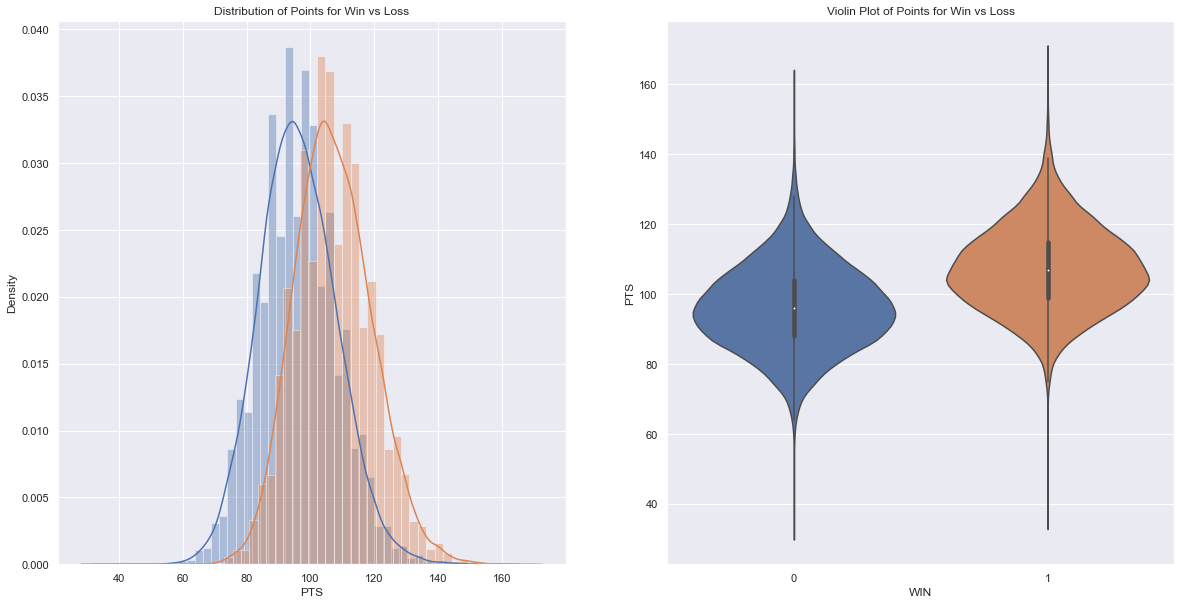

In [281]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.PTS)
sns.distplot(df_wins.PTS)
plt.title('Distribution of Points for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="PTS", data=df)
plt.title('Violin Plot of Points for Win vs Loss')

#### 3.1.2 Field Goal Percent by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Field Goal Percent for Win vs Loss')

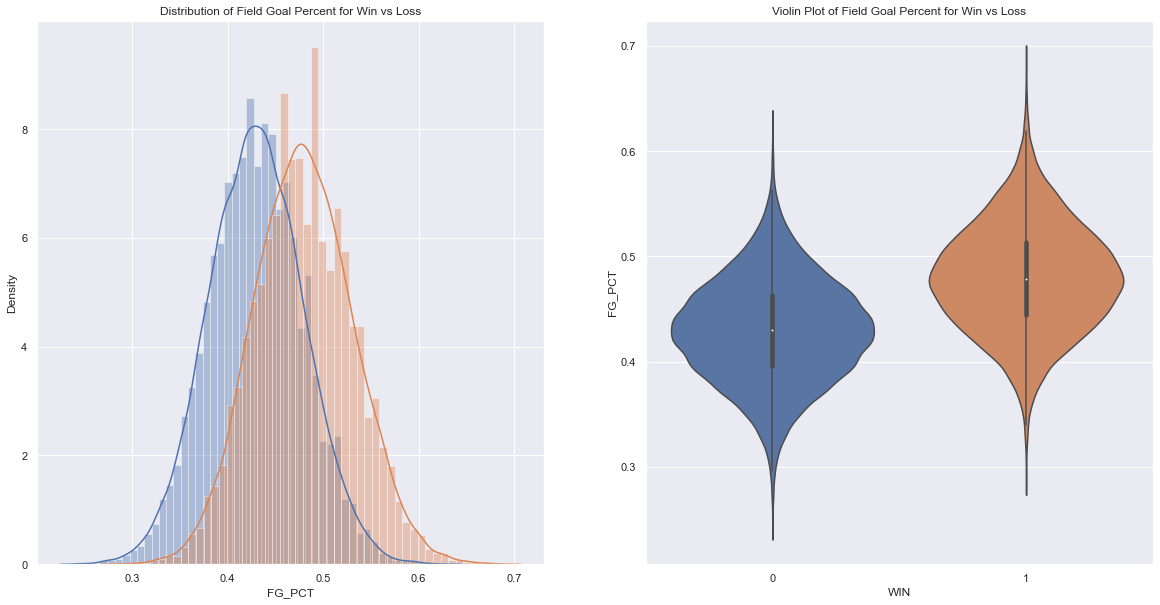

In [282]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FG_PCT)
sns.distplot(df_wins.FG_PCT)
plt.title('Distribution of Field Goal Percent for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FG_PCT", data=df)
plt.title('Violin Plot of Field Goal Percent for Win vs Loss')

#### 3.1.3 Free Throw Percent by Win/Loss

Text(0.5, 1.0, 'Violin Plot of Free Throw Percent Win vs Loss')

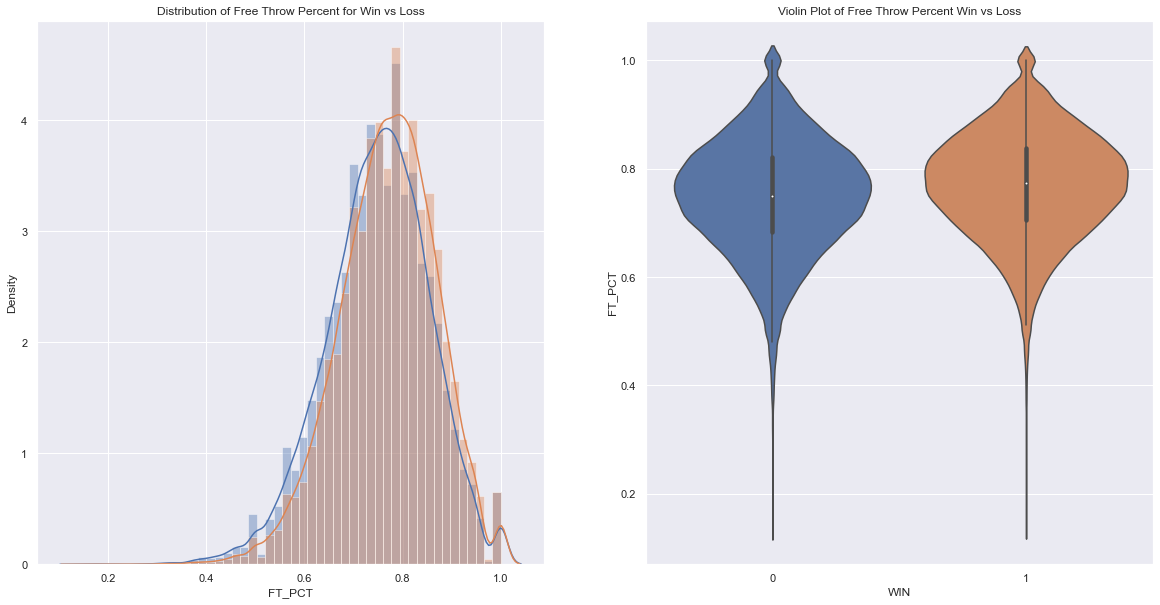

In [283]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FT_PCT)
sns.distplot(df_wins.FT_PCT)
plt.title('Distribution of Free Throw Percent for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FT_PCT", data=df, split=False)
plt.title('Violin Plot of Free Throw Percent Win vs Loss')

#### 3.1.4   3-Point Percentage by Win/Loss

Text(0.5, 1.0, 'Violin Plot of 3-Point Percentage for Win vs Loss')

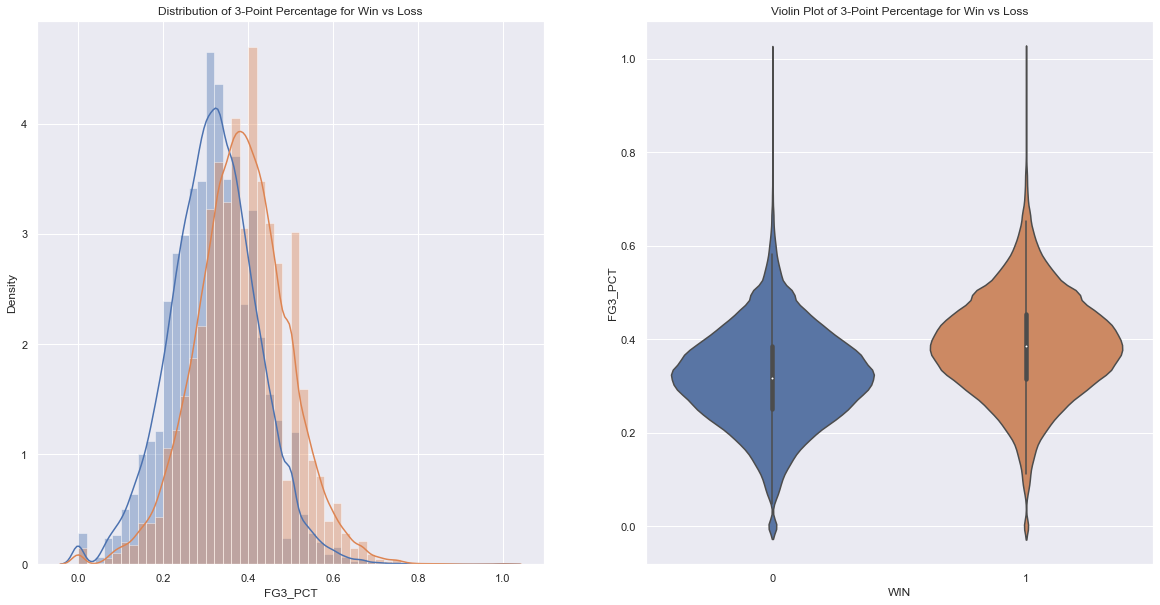

In [284]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.FG3_PCT)
sns.distplot(df_wins.FG3_PCT)
plt.title('Distribution of 3-Point Percentage for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="FG3_PCT", data=df)
plt.title('Violin Plot of 3-Point Percentage for Win vs Loss')

#### 3.1.5 Assists by Win/ Loss

Text(0.5, 1.0, 'Violin Plot of Assists for Win vs Loss')

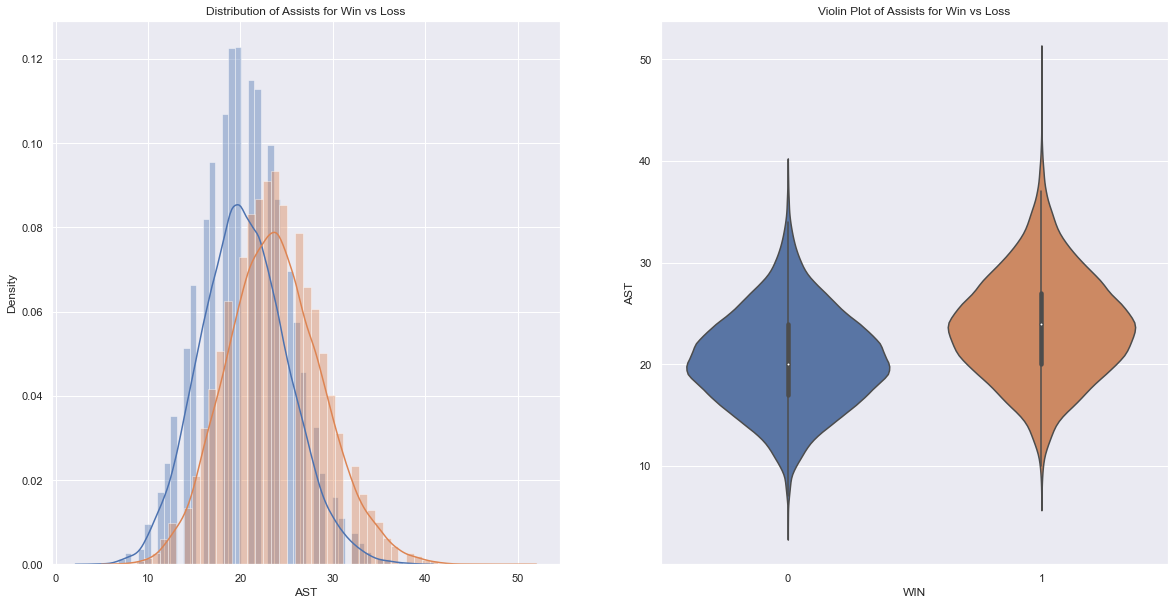

In [285]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.AST)
sns.distplot(df_wins.AST)
plt.title('Distribution of Assists for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="AST", data=df)
plt.title('Violin Plot of Assists for Win vs Loss')

#### 3.1.6 Rebounds by Win/ Loss

Text(0.5, 1.0, 'Violin Plot of Rebounds for Win vs Loss')

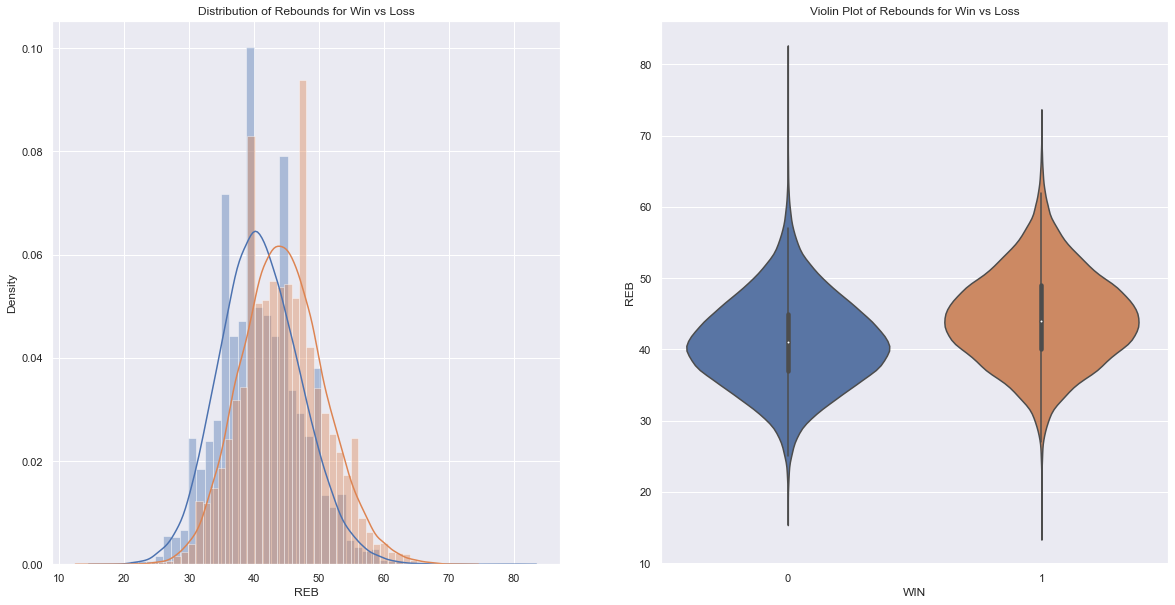

In [286]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(df_losses.REB)
sns.distplot(df_wins.REB)
plt.title('Distribution of Rebounds for Win vs Loss')


ax2 = plt.subplot(1,2,2)
sns.violinplot(x="WIN", y="REB", data=df)
plt.title('Violin Plot of Rebounds for Win vs Loss')

#### 3.1.7 Wins per Year

Text(0.5, 1.0, 'Games Per Year')

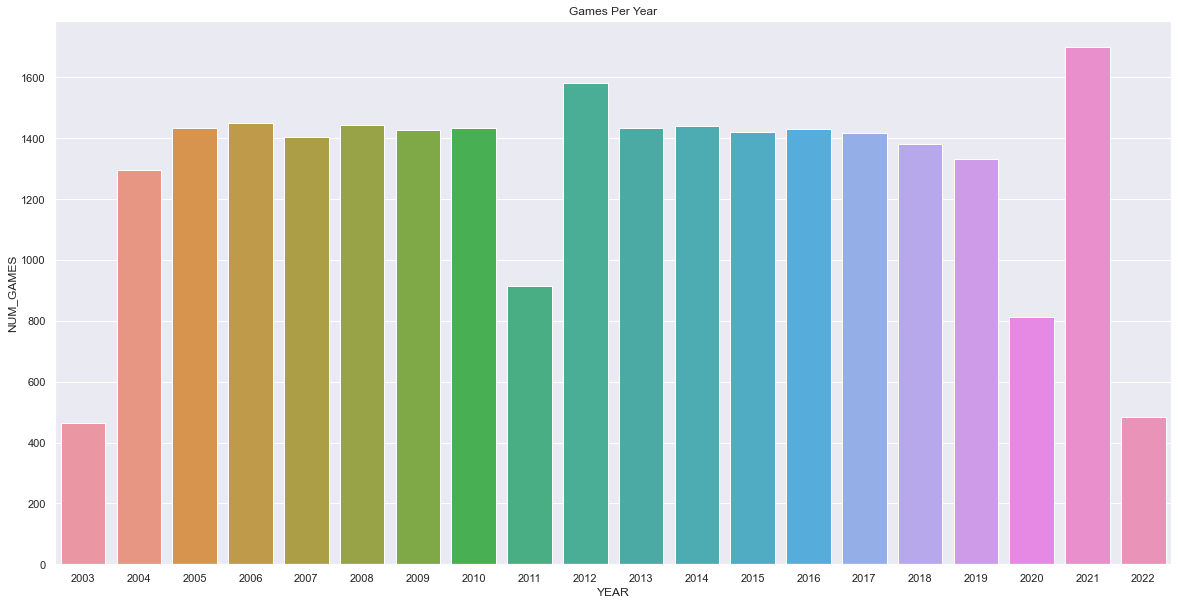

In [287]:
list_year_games = pd.Series(df.groupby('GAME_DATE_EST')['WIN'].sum()).to_list()
list_years = df['GAME_DATE_EST'].unique()
list_years.sort()

df_years_games = pd.DataFrame({'YEAR': list_years, 'NUM_GAMES':list_year_games })

plt.figure(figsize=(20,10))
sns.barplot(data=df_years_games, x='YEAR', y='NUM_GAMES')
plt.title('Games Per Year')

#### 3.1.8 Wins by Home or Away

Total number of games home:  15155
Total number of games away:  10542


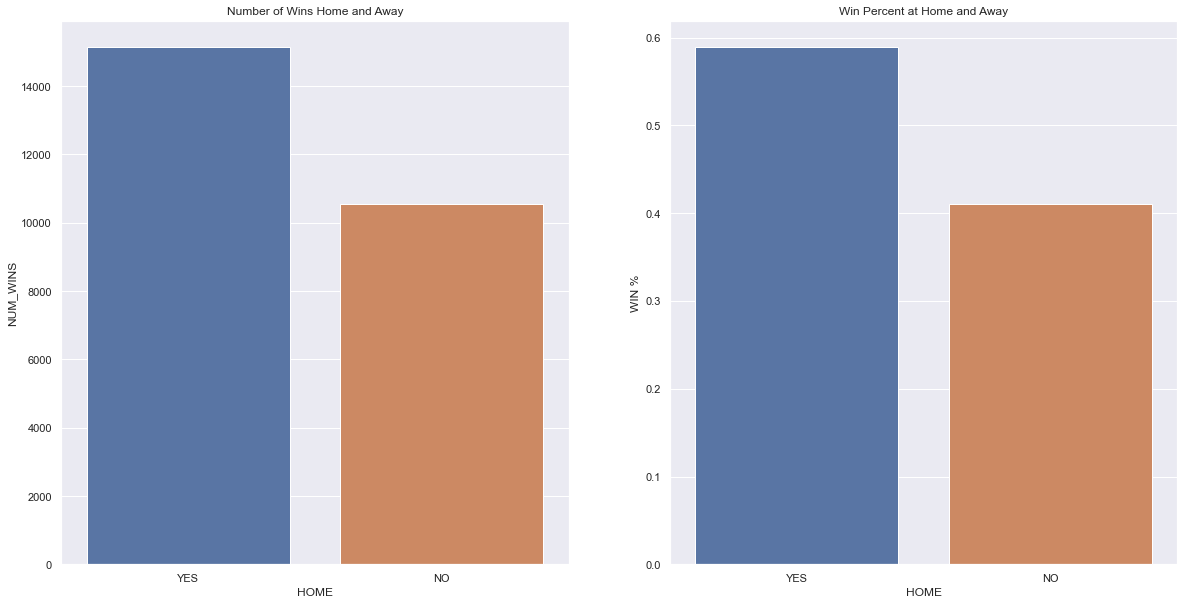

In [288]:
num_home_wins = len(df_wins[(df_wins['HOME'] == 1)])
num_away_wins = len(df_wins[(df_wins['HOME'] == 0)])

home_win_perc = num_home_wins / len(df[df['HOME'] == 1])
away_win_perc = num_away_wins / len(df[df['HOME'] == 0])

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
df_num_wins_home_away = pd.DataFrame({'HOME': ['YES','NO'], 'NUM_WINS':[num_home_wins, num_away_wins] })
sns.barplot(data=df_num_wins_home_away, x='HOME', y='NUM_WINS')
plt.title('Number of Wins Home and Away')

plt.subplot(1,2,2)
df_num_wins_home_away = pd.DataFrame({'HOME': ['YES','NO'], 'WIN %':[home_win_perc, away_win_perc] })
sns.barplot(data=df_num_wins_home_away, x='HOME', y='WIN %')
plt.title('Win Percent at Home and Away')


# print(df_wins['HOME'] == 1)
print('Total number of games home: ', num_home_wins)
print('Total number of games away: ', num_away_wins)

#### 3.1.5 Distributions of Continuous Features (maybe?)


### Distribution plots for each stat

### 3.2 Data Relationship Exploration

#### QUESTIONS:
1. What is the most important stat for winning games (is there a difference for home and away)? (going to be fg%)
2. Is there a correlation of Winning/ 3pts through the years?
3. Throughout the years, has playing at home become more or less important for winning?

#### 3.2.1 What is the most important stat for winning games?

In [289]:
import seaborn as sns
#sns.pairplot(df, hue='WIN')

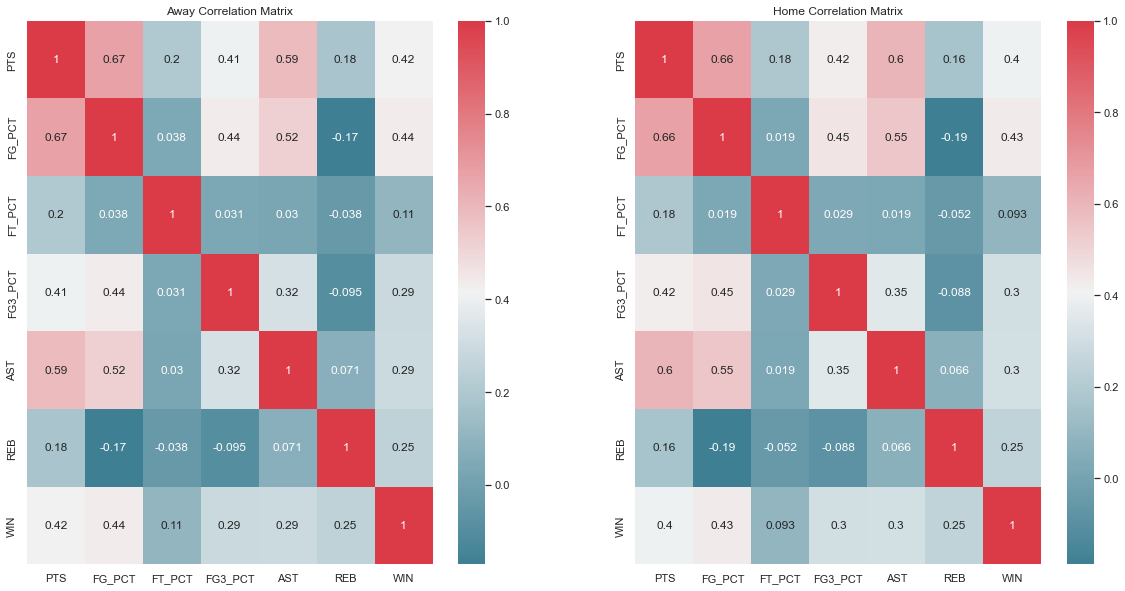

In [296]:
import matplotlib.pyplot as plt
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid") # one of the many styles to plot using
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
#f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(away_df.drop(columns=["HOME"]).corr(), cmap=cmap, annot=True, ax = ax1)
ax1.title.set_text('Away Correlation Matrix')
sns.heatmap(home_df.drop(columns=["HOME"]).corr(), cmap=cmap, annot=True, ax = ax2)
ax2.title.set_text('Home Correlation Matrix')

#### 3.2.2 Is there a correlation of Winning/ 3pts through the years?

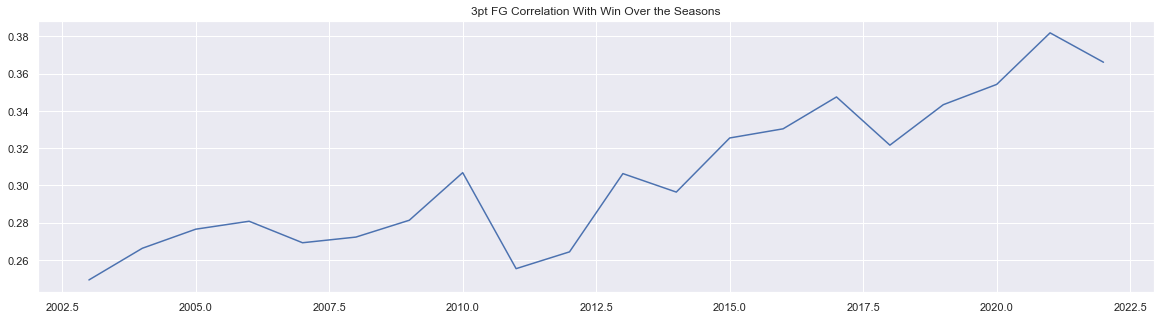

In [301]:

corr_df = df
corr_df=[corr_df[corr_df['GAME_DATE_EST'] == y] for y in corr_df['GAME_DATE_EST'].unique()]
years = []
corr = []
for x in corr_df:
    years.append(x.GAME_DATE_EST.unique()[0])
    corr.append(x.corr().FG3_PCT['WIN'])

plt.subplots(figsize=(20, 5))
plt.subplot(1,1,1)
sns.lineplot(years, corr)
plt.title("3pt FG Correlation With Win Over the Seasons")
plt.show()

#### 3.2.3 Home vs Away Wins by Year

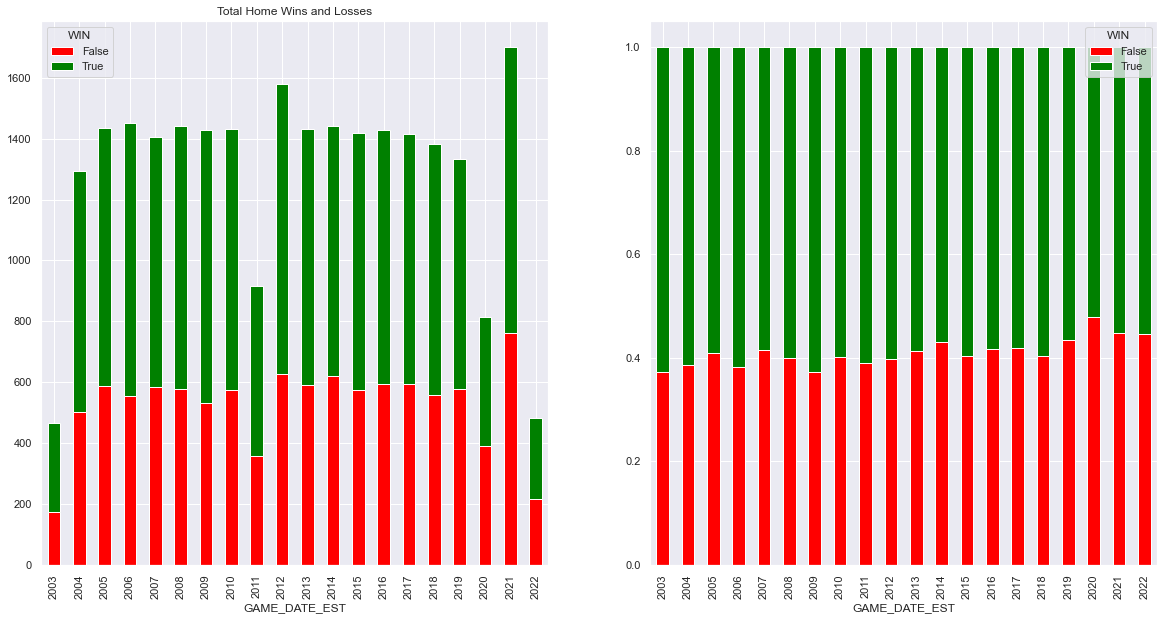

In [299]:
# the cross tab operator provides an easy way to get these numbers
df_wins = (df[(df['WIN'] == 1)])
df_home = (df[(df['HOME'] == 1)])
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

pd.crosstab([df_home['GAME_DATE_EST']], df_home.WIN.astype(bool)).plot(kind='bar', stacked=True, ax = ax1, color = ['red', 'green'])
ax1.title.set_text('Total Home Wins and Losses')

df_wins = pd.crosstab([df_home['GAME_DATE_EST']], df_home.WIN.astype(bool))
win_rate = df_wins.div(df_wins.sum(1).astype(float), axis=0)
win_rate.plot(kind = 'bar', stacked = True,  ax = ax2, color = ['red', 'green'])
ax1.title.set_text('Total Home Wins and Losses')

## 4. Dimensionality Reduction

UMAP is a dimensionality reduction algorithm that works by creating a connected graph of all the points in a dataset. Each of the datapoints are given radii. If the radii of two datapoints intersect then they are considered neighbors, and a connection is made in the graph. The size of the radii is also varying; points that are in dense regions have smaller radii, while points in less dense regions have larger radii. Density is defined as higher when the kth neighbor is close, and lower when the kth nearest neighbor is far. Using a larger k value will keep local structure preserved in the projection, while a lower k will have more global structure preserved.

<AxesSubplot:>

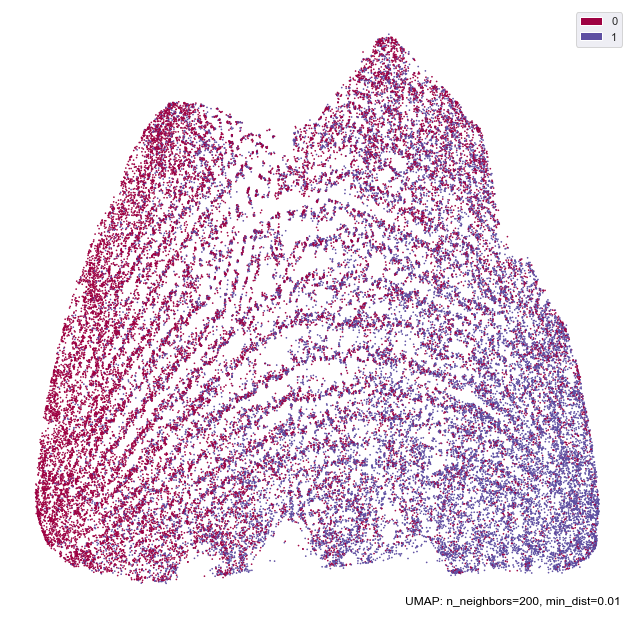

In [294]:
import umap
import umap.plot
data = df.drop(columns=['WIN','GAME_DATE_EST', 'HOME'])

mapper = umap.UMAP(n_neighbors=200, min_dist=0.01).fit(data)
umap.plot.points(mapper, labels=df['WIN'])

There is quite a bit of mixing between win and loss, but we can still see that the left side of the projection contains mostly losses and the right side contains mostly wins. While it isn't a perfect projection, you can conclude from the plot that points on the right are more likely to be a win, and those on the left are more likely to be a loss. This specific example of using a game's data to predict win or loss would not be as useful for real life application since you don't need to predict a game that has already finished. However, if we were to do a similar projection with the stats of games that are part-way through, we might be able to predict the outcome of a game.